# Gender Analysis
Include information and graphs that help answering the following questions
* Do men or women dominate speaking roles in Hollywood movies?
* Has gender balance in speaking roles changed over time?
* Do films in which men do more speaking make a lot more money than films in which women speak more?

## Some graphs to include
Plot the following by year
* General proportion of male lead.
* Proportion of words spoken.
* Lead age average by gender
* XXWords per non-lead person on average depending on gender (the same proportion stands as with the lead?)
* Gross vs gender speaking percentage: gross on X, male word % on y. .
To-do:
* Show imbalance in terms of number of actors per gender. Even in female-led movies, there are more male actors on average.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
sns.set_theme(style="darkgrid")

In [68]:
# Load the dataset
url = 'data/train.csv'
data = pd.read_csv(url)

In [69]:
# Dropping 0-word entries

# Get indexes for which the number of words of female or male is 0
dropIndex = data[ (data['Number words female'] == 0) | (data['Number words male'] == 0) ].index

# Delete the rows from the dataset
data.drop(dropIndex , inplace=True)
data['Number words co-lead'] = data['Number of words lead'] - data['Difference in words lead and co-lead']

In [70]:
# Index by year for easier management of data
data.reset_index(inplace=True)
data.set_index('Year', inplace=True) 
data.sort_index(ascending=True, inplace=True);

# Select years to focus on (start in 1981, before there is little data)
years = np.array(data.index.unique())
years = years[years > 1980]

years_dict = {'Year': years} # create dict of years for feeding a pandas dataframe
analysis_df = pd.DataFrame(data=years_dict) # create a dataframe with a first column 'Year'
analysis_df.set_index('Year');

In [73]:
# Populate analysis_df with relevant stats, consolidated by year

m_lead_p_year = []
f_lead_p_year = []
m_words_p_year = []
f_words_p_year = []
f_age_mean = []
m_age_mean = []
f_lead_age_mean = []
m_lead_age_mean = []
m_actors_p = []
f_actors_p = []


for year in years:
    
    year_df = data.loc[[year]] # Create a DF with the year (making sure it comes as a matrix)
    
    # % of male lead actors
    num_movies = len(year_df)
    m_lead_p_year.append((year_df['Lead'] == 'Male').sum() / num_movies)
    f_lead_p_year.append((year_df['Lead'] == 'Female').sum() / num_movies)
    
    # % of words spoken by male and female
    num_words_male = year_df['Number words male'].sum()
    num_words_male += year_df[(year_df['Lead'] == 'Male')]['Number of words lead'].sum()
    m_words_p_year.append(num_words_male / year_df['Total words'].sum())
    
    num_words_female = year_df['Number words female'].sum()
    num_words_female += year_df[(year_df['Lead'] == 'Female')]['Number of words lead'].sum()
    f_words_p_year.append(num_words_female / year_df['Total words'].sum())
    
    # Female and male age average
    f_age_mean.append(year_df['Mean Age Female'].mean())
    m_age_mean.append(year_df['Mean Age Male'].mean())
    
    # Female and male lead age average
    f_lead_age_mean.append(year_df[(year_df['Lead'] == 'Female')]['Age Lead'].mean())
    m_lead_age_mean.append(year_df[(year_df['Lead'] == 'Male')]['Age Lead'].mean())
    
    
analysis_df['Male lead %'] = m_lead_p_year
analysis_df['Female lead %'] = f_lead_p_year
analysis_df['Male words %'] = m_words_p_year
analysis_df['Female words %'] = f_words_p_year
analysis_df['Mean age female'] = f_age_mean
analysis_df['Mean age male'] = m_age_mean
analysis_df['Female lead age mean'] = f_lead_age_mean
analysis_df['Male lead age mean'] = m_lead_age_mean

In [74]:
analysis_df.describe()

,Year,Male lead %,Female lead %,Male words %,Female words %,Mean age female,Mean age male,Female lead age mean,Male lead age mean
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,34.000000,35.000000
mean,1998.000000,0.766779,0.233221,0.707216,0.292784,35.557863,42.261814,33.731939,39.975132
std,10.246951,0.093939,0.093939,0.047272,0.047272,3.040956,2.752209,5.298813,3.499240
min,1981.000000,0.473684,0.000000,0.537967,0.185831,28.281667,38.410913,25.600000,33.166667
25%,1989.500000,0.715476,0.181818,0.680334,0.257701,33.859821,40.840010,29.375000,37.511111
50%,1998.000000,0.780488,0.219512,0.710688,0.289312,35.312446,41.903704,32.928571,40.000000
75%,2006.500000,0.818182,0.284524,0.742299,0.319666,37.294010,43.323220,36.886364,41.695000
max,2015.000000,1.000000,0.526316,0.814169,0.462033,43.046825,53.223958,48.250000,48.833333


In [75]:
analysis_df.tail()

,Year,Male lead %,Female lead %,Male words %,Female words %,Mean age female,Mean age male,Female lead age mean,Male lead age mean
30,2011,0.659091,0.340909,0.651648,0.348352,38.862771,44.415346,37.066667,39.896552
31,2012,0.740741,0.259259,0.679631,0.320369,38.361287,43.325504,37.000000,41.250000
32,2013,0.862069,0.137931,0.716384,0.283616,39.037356,43.396596,48.250000,38.800000
33,2014,0.714286,0.285714,0.678631,0.321369,43.046825,43.609392,32.500000,46.666667
34,2015,0.473684,0.526316,0.537967,0.462033,42.401754,49.105981,45.100000,47.888889


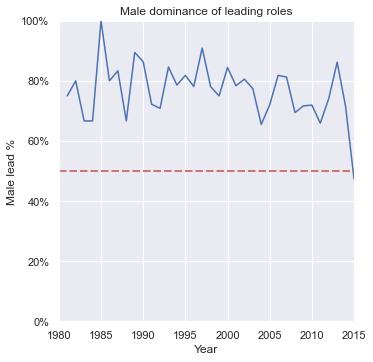

In [62]:
male_lead_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Male lead %', kind='line');
male_lead_plot.set(xlim=(1980,2015), ylim=(0,1), title="Male dominance of leading roles")
male_lead_plot.ax.axline(xy1=(1980, 0.5), slope=0, color="r", dashes=(5, 2))
male_lead_plot.ax.yaxis.set_major_formatter(PercentFormatter(1))

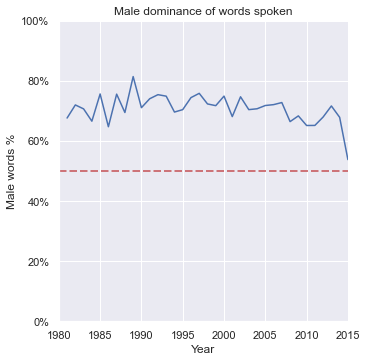

In [63]:
male_words_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Male words %', kind='line');
male_words_plot.set(xlim=(1980,2015), ylim=(0,1), title="Male dominance of words spoken")
male_words_plot.ax.axline(xy1=(1980, 0.5), slope=0, color="r", dashes=(5, 2))
male_words_plot.ax.yaxis.set_major_formatter(PercentFormatter(1))

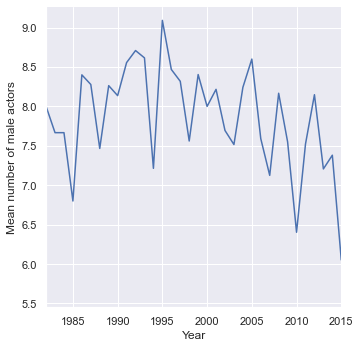

In [59]:
male_lead_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Mean number of male actors', kind='line');
male_lead_plot.set(xlim=(1982,2015))

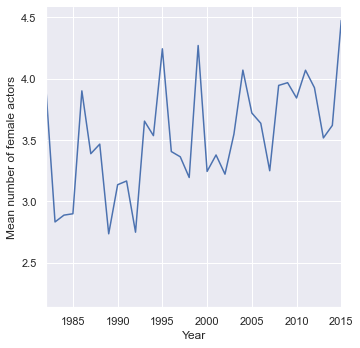

In [60]:
male_lead_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Mean number of female actors', kind='line');
male_lead_plot.set(xlim=(1982,2015))

## Other general statistics

In [48]:
m_words_p = [] # Male words %
f_words_p = [] # Female words %

meanw_per_actor = [] # Mean words per actor
meanw_per_actress = [] # Mean words per actress

for (idx, row) in data.iterrows():
    total_words = row.loc['Total words']
    words_male = row.loc['Number words male']
    words_female = row.loc['Number words female']
    words_lead = row.loc['Number of words lead']
    num_actress = row.loc['Number of female actors']
    num_actors = row.loc['Number of male actors']
    
    lead = row.loc['Lead']
    if lead == 'Male':
        words_male += words_lead
        m_words_p.append(words_male / total_words)
        f_words_p.append(words_female / total_words)
        meanw_per_actor.append(m_t_words / num_actors)
        meanw_per_actress.append(words_female)
    else:
        words_female += words_lead
        f_words_p.append(words_female / total_words)
        m_words_p.append(words_male / total_words)
        meanw_per_actor.append(words_male / num_actors)
        meanw_per_actress.append(words_female / num_actress)
        
    
data['Male words %'] = m_words_p
data['Female words %'] = f_words_p
data['Mean words per actress'] = meanw_per_actress
data['Mean words per actor'] = meanw_per_actor

In [49]:
data.head()

,index,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead,Number words co-lead,Male words %,Female words %,Mean words per actress,Mean words per actor
Year,,,,,,,,,,,,,,,,,,,
1939,218,1326,9092,3060.0,1709,7,3,4706,839.0,47.166667,36.333333,17.0,35.0,Female,1351.0,0.517598,0.482402,1462.0,672.285714
1939,544,5146,15363,6350.0,1204,10,1,3867,45.0,49.800000,34.000000,38.0,34.0,Male,5146.0,0.665039,0.334961,5146.0,653.100000
1949,1011,1512,9053,3160.0,1760,8,2,4381,8.0,45.500000,54.500000,44.0,28.0,Male,1400.0,0.832984,0.167016,1512.0,816.375000
1954,578,8528,18744,9974.0,4878,2,2,242,30.0,41.500000,38.500000,46.0,25.0,Male,5096.0,0.545028,0.454972,8528.0,3265.500000
1954,856,1939,10553,3954.0,2138,11,2,4660,185.0,38.714286,33.500000,30.0,30.0,Male,1816.0,0.816261,0.183739,1939.0,593.727273


In [37]:
data.describe()

,index,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Number words co-lead,Male words %,Female words %
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,520.535044,2375.824284,11147.630800,4156.122409,2567.855874,7.818361,3.563672,4615.684107,109.979269,42.256765,35.972203,38.777887,35.390918,1588.266535,0.701819,0.298181
std,299.733745,2150.615952,6822.072347,2988.035028,2511.340011,3.880194,2.080196,3429.487030,151.832276,7.766994,8.934847,12.302472,12.038279,1371.320009,0.205295,0.205295
min,0.000000,102.000000,1351.000000,318.000000,1.000000,1.000000,1.000000,113.000000,0.000000,19.000000,13.000000,11.000000,7.000000,102.000000,0.006809,0.006506
25%,262.000000,965.000000,6581.000000,2111.000000,869.000000,5.000000,2.000000,2188.000000,22.000000,37.285714,29.500000,30.000000,28.000000,667.000000,0.596965,0.145189
50%,519.000000,1730.000000,9351.000000,3398.000000,1850.000000,7.000000,3.000000,3882.000000,59.000000,42.500000,35.000000,38.000000,34.000000,1186.000000,0.753887,0.246113
75%,781.000000,3073.000000,14205.000000,5292.000000,3436.000000,10.000000,5.000000,5930.000000,140.000000,47.260870,41.500000,46.000000,41.000000,2074.000000,0.854811,0.403035
max,1038.000000,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000,10316.000000,0.993494,0.993191


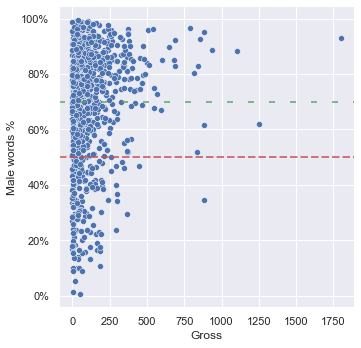

In [65]:
gross_plot = sns.relplot(data=data, x=data['Gross'], y=data['Male words %']);
gross_plot.ax.axline(xy1=(200, 0.5), slope=0, color="r", dashes=(5, 2))
gross_plot.ax.axline(xy1=(200, 0.70), slope=0, color="g", dashes=(4, 10))
gross_plot.ax.yaxis.set_major_formatter(PercentFormatter(1))

Above the red dotted line are the movies where male actors speak more than 50% of the words (gender balance).

Above the green dotted line are the movies where male actors speak more than 75% of the words (overall male speaking % mean).

On both accounts, movies with higher gross (X axis) tend to have more % of the words spoken by males.

## Other tests
Below are other tests.. for example, exploring if there are analysis respecting age. For example, the mean age of females in films is 7 years younger than males. Can other interesting relationships can be seen?

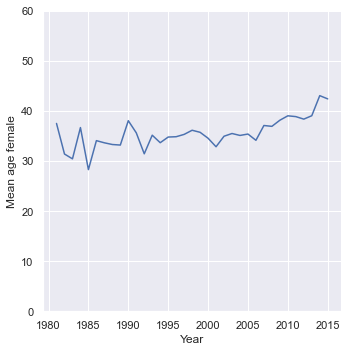

In [50]:
female_age_average_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Mean age female', kind='line');
female_age_average_plot.set(ylim=(0,60));

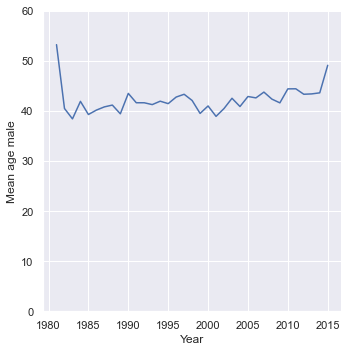

In [51]:
female_age_average_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Mean age male', kind='line');
female_age_average_plot.set(ylim=(0,60));